# Gaming Trends 2024: More Than Just Play

The gaming industry has grown far beyond its roots as entertainment. Today, it operates as a cultural, technological and economic force influencing how people connect, compete and create.
Gaming is now a living ecosystem, constantly shaped by new platforms, evolving genres, community voices and global market forces.

From blockbuster AAA(Tripe-A)* titles and indie hits to Mobile-first sensations and immersive VR experiences, the way pepople engage with games has diversified dramatically. Platforms today are not just delivery mechanisms, they define how players intercat with content. Meanwhile, genres are no longer categories but felxible creative spaces that merge mechanics, storytelling and player emotion.

**Goal**

To develop a data-backed understanding of how different variables, such as genre popularity, influencer endorsements or platform engagement impact a game's performance. Based on these insights, the project will generate strategic recommendations tailored to core stakeholder groups such as Game Developers, Publishers, Product Managers, Game Designers, Marketers.

The primary goal of this capstone is to:

- Predict and interpret Revenue Per User (RPU) using scalable ML models.
- Align findings to stakeholder priorities such as game design, platform strategy, campaign planning and content scheduling.

This project offers a blueprint for data0driven decision-making in the gaming ecosystem, helping studios improve monetization without compromising user experience.

**Problem Statement**

Game Studios today face a multidimensional challenge:

- Which combination of player engagement, platform type and monetization strategies drive success?
- How can we use Machine Learning to forecast revenue performance and generate role-specific recommendations for key stakehodlers?

While game analytics tools often show surface-level KPIs, they fall short of revealing the interplay between behavioral signals and monetization performance, especially at per user level.

This project addresses this gap by:

- Engineering a refined target variable for revenue per user.
- Modeling both linear and non linear relationships between engagement behviors, content exposure and monetization outputs.
- Translating model outputs into stakeholder-aligned insights using interpretability tools such as Feature Importance and Partial Dependence Plots

**Data Source**

The dataset used for this capstone project is "Gaming Trends 2024" [dataset](https://www.kaggle.com/datasets/anonymous28574/gaming-trends-2024), from Kaggle.

the data spans 4989 entries and covers behavioral,financial and marketing-relevant dimensions, making it suitable for end-to-end modeling and stakeholder analysis.


**Methodology**

The project follows a structured machine learning pipeline with a focus on business-aligned interpretability:

1. Data Preparation & Feature Engineering
2. Exploratory Data Analysis(EDA)
3. Baseline Modeling & Evaluation
4. Advanced Modeling & Evaluation
5. Interpretability & Insights

***AAA (Triple-A) Games:** refer to high-budget, high-profile games developed and published by major studies. Examples include titles like Elden Ring, The Lengend of Zelda: Tears of the Kingdon or Call of Duty.

# Data Import and Cleaning

**About the Dataset**

**Understanding the Pulse of the Gaming Market**

The [dataset](https://www.kaggle.com/datasets/anonymous28574/gaming-trends-2024) used in this project, includes both quantitative metrics, such as player activity and revenue and qualitative indicators, such as social media buzz and influencer backing.

Each row in the dataset represents a game, and the variables reflect its reach, popularity and business performance.

Here's a breakdown of the key features:

Variable <---------------------------------------> Description

---

```
date                         The release data of the game.
```
```
platform                     The platform type where the game is available (e.g., PS, Console, Mobile, VR).
```
```
daily_active_users (DAU)     The average number of users who play the game daily. A measure of consistent engagement.
```
```
new_registrations            The number of new player sign-ups. A metric for growth and acquisitions.
```
```
session_duration             Average time(in mins) spent per session. This indicates the depth of engagement.
```
```
in_game_purchases            Revenue earned from micro-transactions, downloadable content or premium in-game items.
```
```
social_media_mentions        The number of mentions the game has received across social media platforms, used as a proxy for community buzz.
```
```
streamable_viewership        Number of people wtaching the game via streaming platforms like Twitch or YouTube Gaming.
```
```
revenue                      Total revenue generated from all sources including purchases, subscriptions, and data.
```
```
top_genre                    The primary genre of the game(e.g., Action, Strategy, Simulation, RPG).
```
```
influencer_endorsements      A binary variable (0 = no, 1 = yes) indicating whether major influencers have promoted the game.
```

These features allow for a layered exploration of what success looks like in today's gaming world - spanning from hardcore engagement to commercial viability.

In [4]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Load Data

df = pd.read_csv("../data/gaming_trends_2024.csv")

In [24]:
# Initial Inspection

df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4989 entries, 0 to 4988
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        4989 non-null   object 
 1   Platform                    4989 non-null   object 
 2   Daily Active Users (DAU)    4989 non-null   int64  
 3   New Registrations           4989 non-null   int64  
 4   Session Duration (minutes)  4989 non-null   float64
 5   In-game Purchases ($)       4989 non-null   float64
 6   Social Media Mentions       4989 non-null   int64  
 7   Stream Viewership           4989 non-null   float64
 8   Revenue ($)                 4989 non-null   float64
 9   Top Genre                   4989 non-null   object 
 10  Influencer Endorsements     4989 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 428.9+ KB


,Daily Active Users (DAU),New Registrations,Session Duration (minutes),In-game Purchases ($),Social Media Mentions,Stream Viewership,Revenue ($),Influencer Endorsements
count,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000
mean,111071.252957,11106.669072,58.349332,52079.754650,5727.306875,59989.377645,70411.817171,0.449589
std,51825.934921,5182.591086,21.826225,24831.727842,2435.780271,22887.182173,41996.191553,0.606463
min,10009.000000,1000.000000,8.236262,10009.847567,1001.000000,20012.244966,5010.198644,0.000000
25%,67896.000000,6789.000000,40.586113,31312.560583,3797.000000,40175.212242,33134.929420,0.000000
50%,117520.000000,11752.000000,56.503485,50127.674771,5927.000000,59670.764554,64279.959705,0.000000
75%,153186.000000,15318.000000,75.941008,72301.012982,7701.000000,79328.227960,106563.117966,1.000000
max,199907.000000,19990.000000,99.997146,99954.556507,9999.000000,111958.552918,149993.898008,7.000000


In [26]:
# Standardize columns names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Clean the column names
df.columns = df.columns.str.replace('[^a-zA-Z0-9_]', '', regex=True)
df.describe()

,daily_active_users_dau,new_registrations,session_duration_minutes,ingame_purchases_,social_media_mentions,stream_viewership,revenue_,influencer_endorsements
count,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000
mean,111071.252957,11106.669072,58.349332,52079.754650,5727.306875,59989.377645,70411.817171,0.449589
std,51825.934921,5182.591086,21.826225,24831.727842,2435.780271,22887.182173,41996.191553,0.606463
min,10009.000000,1000.000000,8.236262,10009.847567,1001.000000,20012.244966,5010.198644,0.000000
25%,67896.000000,6789.000000,40.586113,31312.560583,3797.000000,40175.212242,33134.929420,0.000000
50%,117520.000000,11752.000000,56.503485,50127.674771,5927.000000,59670.764554,64279.959705,0.000000
75%,153186.000000,15318.000000,75.941008,72301.012982,7701.000000,79328.227960,106563.117966,1.000000
max,199907.000000,19990.000000,99.997146,99954.556507,9999.000000,111958.552918,149993.898008,7.000000


In [28]:
# Check Influencer Endosements column distribution

df['influencer_endorsements'].value_counts()

influencer_endorsements
0    2910
1    1997
2      36
3      23
4      14
5       6
6       2
7       1
Name: count, dtype: int64

In [30]:
# Binarize the influencer endorsement column values, as the values for "being promoted" seems to be distributed over a range of 1-7.
# 0 - No Promotion
# 1 - Yes, Promoted (by either influencer or streamer)

df['influencer_endorsements'] = df['influencer_endorsements'].apply(lambda x: 0 if x == 0 else 1)

In [32]:
# check the result

df['influencer_endorsements'].value_counts()

influencer_endorsements
0    2910
1    2079
Name: count, dtype: int64

In [34]:
# Check for missing values across all columns
missing = df.isnull().sum()

# Filter and show only columns with missing values
missing = missing[missing > 0].sort_values(ascending = False)

print("Missingvalues per column:\n", missing)

Missingvalues per column:
 Series([], dtype: int64)


# Feature Engineering

Let's reverse-engineer the feature selection by aligning it with stakeholder-focused recommendations, so the model directly supports meaningful insights.

Goal: Pick Features Based on Stakeholder Use Cases

Below is a mapping of stakeholder needs -> aligned features from the dataset:

1. **Game Developers**
=> Which design features improve retention or Daily Active Users?

 * session_duration_minutes
 * daily_active_users_dau
 * engagement_level (created later)
 * top_genre
 * platform


2. **Publishers**
=> Which genre-platform combinations driver ROI?

 * platform
 * top_genre
 * in_game_purchases


3. Marketers
=> What drives community interest and membership purchases?

 * social_media_mentions
 * stream_viewership
 * influencer_endorsements
 * new_registrations


4. Product Managers & Designers
=> Which gameplay behaviors and mechanics improve experience and retention?

 * session_duration_minutes
 * engagement_level
 * stream_viewership
 * daily_active_users_dau
 * top_genres


* Create a per-user monetization metric -> revenue_per_user
  * A game with high total revenue may look successful, but revenue_per_user tells you how efficiently it's monetizing its player base.
  * revenue_per_user feature is good for understanding monetization strength independent of audience size.

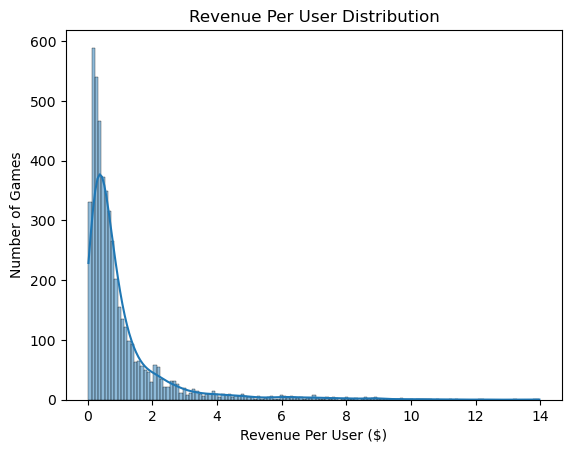

In [37]:
# Revenue per user
df['revenue_per_user'] = df['revenue_'] / df['daily_active_users_dau']

# Plot a histogram to check if revenue per user distribution is skewed
sns.histplot(df['revenue_per_user'], kde = True)
plt.title('Revenue Per User Distribution')
plt.xlabel('Revenue Per User ($)')
plt.ylabel('Number of Games')
plt.show()

* Apply log transformation to reduce skew in revenue_per_user distribution.
  * heavy concentration below 2 and a long tail extending up to ~14.
* Reduce the influence of extreme outliers by applying log transformation.
* Improve the model performance, especially for regression or KNN or clustering.

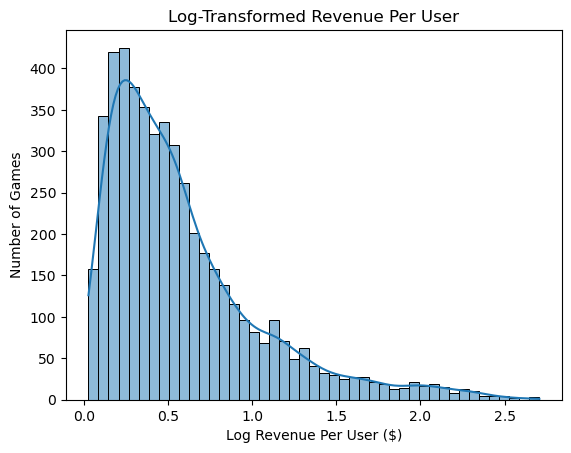

In [39]:
# log transformation of revenue per user

df['log_revenue_per_user'] = np.log1p(df['revenue_per_user'])

# plot a hsitogram to check if it is normalized
sns.histplot(df['log_revenue_per_user'], kde = True)
plt.title('Log-Transformed Revenue Per User')
plt.xlabel('Log Revenue Per User ($)')
plt.ylabel('Number of Games')
plt.show()

* Apply log transformation to revenue_ data that has a wide range from ~5,000 - ~150,000 with likely strong right skew.
* the transformation compresses high revenue values and helps models treat all data points more evenly.

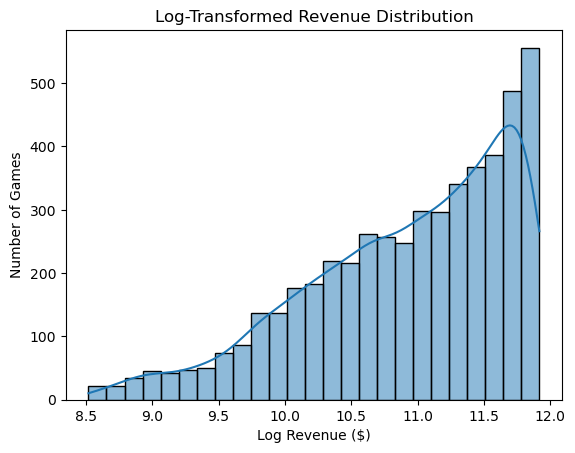

In [41]:
# log transformation of revenue
df['log_revenue'] = np.log1p(df['revenue_'])

# plot a historgram to check if it is normalized
sns.histplot(df['log_revenue'], kde = True)
plt.title('Log-Transformed Revenue Distribution')
plt.xlabel('Log Revenue ($)')
plt.ylabel('Number of Games')
plt.show()

* Categorize Engagement into engagement_level based on Session duration

  * Low: 0 - 5 minutes
  * Medium: : 5-15 minutes
  * High: > 15 - 99.99 minutes(max value)

* include_lowest = True ensures the first bin includes the minimum session value (e.g., if it's exactly 0)

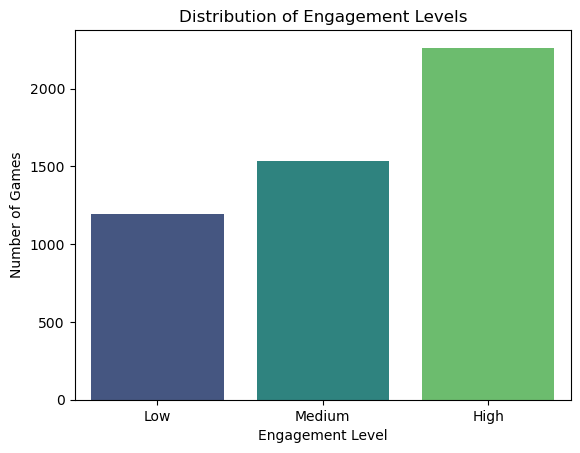

In [43]:
# Use actual max session duration from the dataset
max_duration = df['session_duration_minutes'].max()

# Define engagement levels using the max value
df['engagement_level'] = pd.cut(df['session_duration_minutes'],
                                bins = [0, 40, 60, max_duration],
                                labels = ['Low', 'Medium', 'High'],
                                include_lowest = True)

# plot the count of games per engagement level
sns.countplot(data=df, hue='engagement_level', x='engagement_level', legend = False,  palette='viridis')
plt.title('Distribution of Engagement Levels')
plt.xlabel('Engagement Level')
plt.ylabel('Number of Games')
plt.show()

**Scaling the Features**

To prepare the dataset for machine learning, let's apply Min-Max normalization to selected numerical features.

Features that can be scaled:
 * daily_active_users_dau
 * session_duration_minutes
 * in_game_purchases
 * revenue_per_user
 * log_revenue
 * social_media_mentions
 * stream_viewership
 * new_registrations

This technique rescales values to [0,1] range, preserving relative relationships while preventing features with large numeric scales from dominating model behavior.

Features like daily_active_users_dau and revenue_ have much larger magnitudes compared to features like session_duration_minutes or in_game_purchases.

Without scaling, the model might wrongly treat large-magnitude features as more important then others.

In [45]:
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

# Select numerical features for scaling
features_to_scale = [
    'daily_active_users_dau',
    'session_duration_minutes',
    'ingame_purchases_',
    'revenue_per_user',
    'log_revenue',
    'social_media_mentions',
    'stream_viewership',
    'new_registrations'
]

# Apply MinMax scalng
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[features_to_scale])

# Rename the scaled columns for clarity
scaled_features_names = [f'scaled_{col}' for col in features_to_scale]
scaled_df = pd.DataFrame(scaled_features, columns=scaled_features_names)

# Combine scaled features with original dataframe
df = pd.concat([df, scaled_df], axis=1)

df = df.loc[:, ~df.columns.duplicated()].copy()

df.info()

timestamp = datetime.now().strftime("%Y%m%d_%H%m%S")
df.to_csv(f'data/scaled_data_{timestamp}.csv', index=False)
print(f"Saved data with scaled featurs as: scaled_data_{timestamp}.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4989 entries, 0 to 4988
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   date                             4989 non-null   object  
 1   platform                         4989 non-null   object  
 2   daily_active_users_dau           4989 non-null   int64   
 3   new_registrations                4989 non-null   int64   
 4   session_duration_minutes         4989 non-null   float64 
 5   ingame_purchases_                4989 non-null   float64 
 6   social_media_mentions            4989 non-null   int64   
 7   stream_viewership                4989 non-null   float64 
 8   revenue_                         4989 non-null   float64 
 9   top_genre                        4989 non-null   object  
 10  influencer_endorsements          4989 non-null   int64   
 11  revenue_per_user                 4989 non-null   float64 
 12  log_re